Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import RFE
from sklearn.metrics import classification_report,confusion_matrix,f1_score,accuracy_score

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

Load Data

In [2]:
train = pd.read_csv(r"c:\Users\ezath\Downloads\archive (8)\train_u6lujuX_CVtuZ9i.csv")
test = pd.read_csv(r"c:\Users\ezath\Downloads\archive (8)\test_Y3wMUE5_7gLdaTN.csv")

Show Data

In [3]:
train.head(20)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [4]:
train.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [5]:
train['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [6]:
train['Loan_Amount_Term'].value_counts()

Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

In [7]:
train['Credit_History'].value_counts()

Credit_History
1.0    475
0.0     89
Name: count, dtype: int64

In [8]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


In [9]:
train.shape

(614, 13)

In [10]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [11]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Data Cleaning

Check for duplicated values

In [13]:
train.duplicated().sum()

np.int64(0)

Check For Null Values

In [14]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Handle Null Values

In [15]:
null_object_values=['Gender','Dependents','Self_Employed','Credit_History','Loan_Amount_Term']
for col in null_object_values:
  train[col].fillna(train[col].mode()[0],inplace=True)

In [16]:
train['LoanAmount'].fillna(train['LoanAmount'].median(),inplace=True)

In [17]:
train.dropna(subset=['Married'],inplace=True)

Check For Outliers

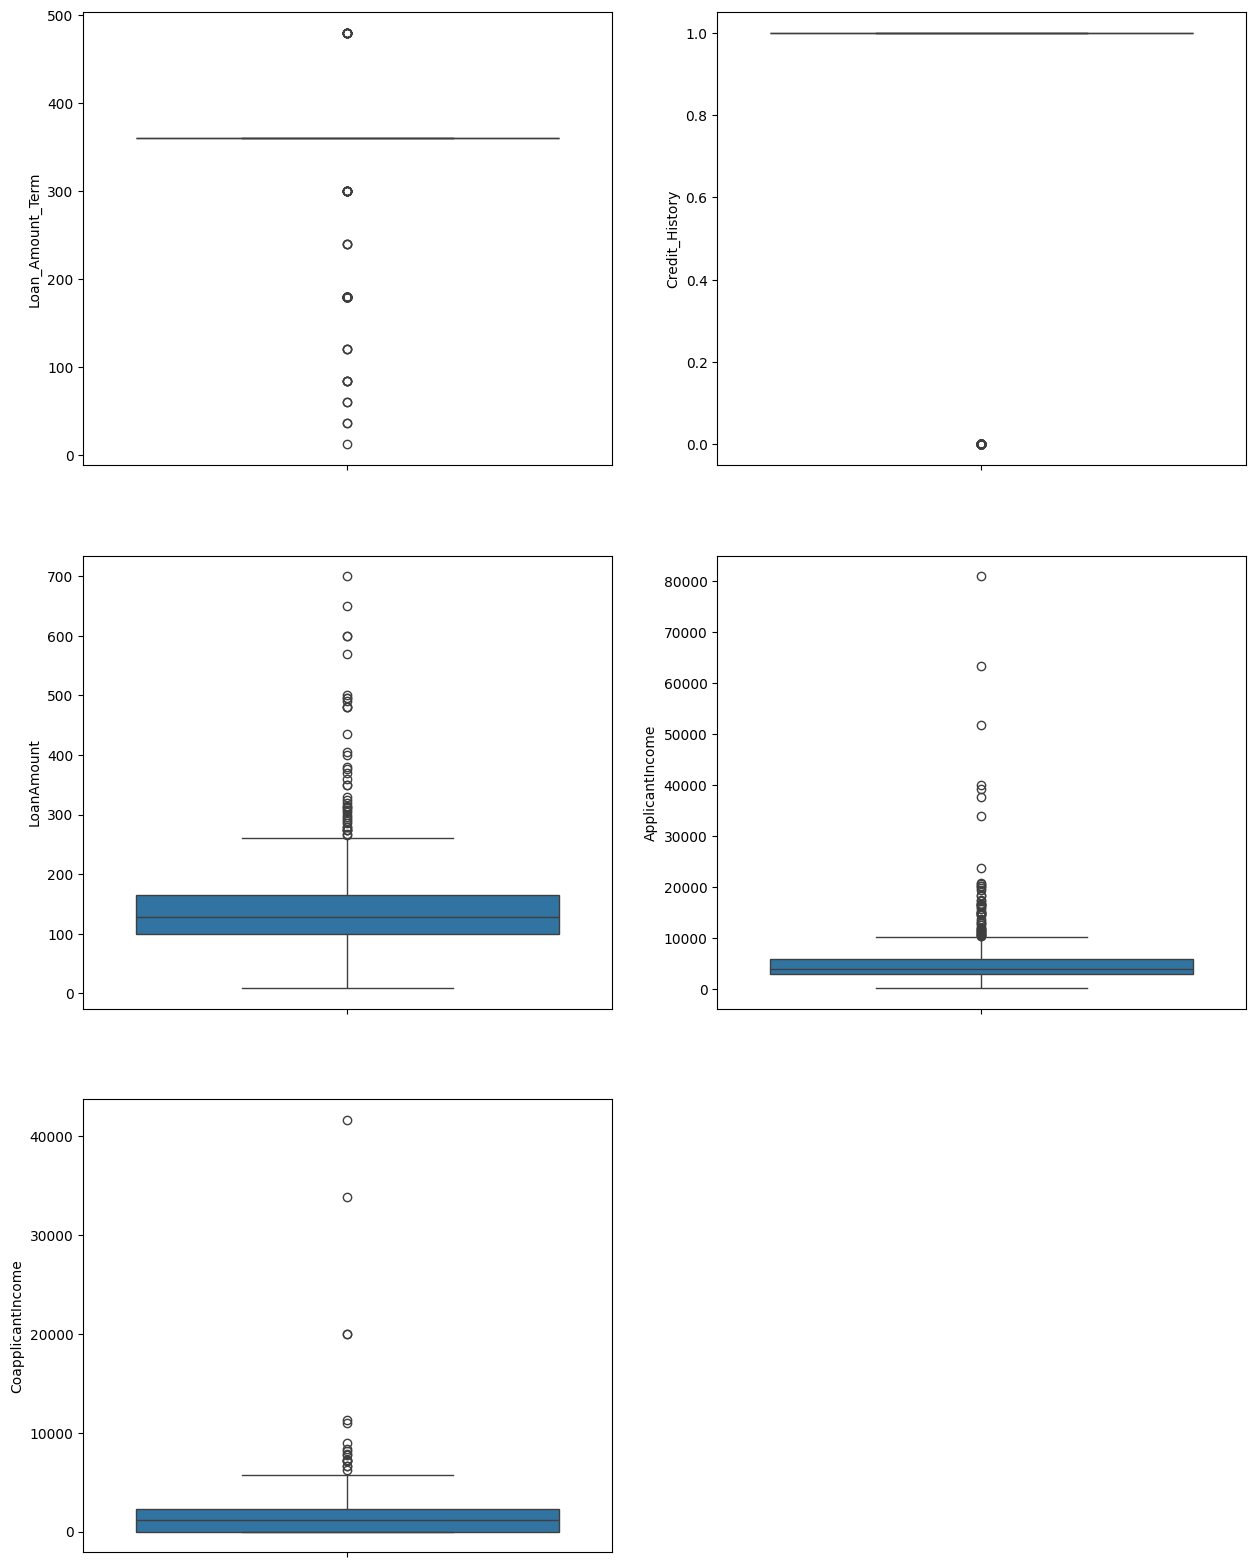

<Figure size 640x480 with 0 Axes>

In [18]:
values=['Loan_Amount_Term','Credit_History','LoanAmount','ApplicantIncome','CoapplicantIncome']
plt.figure(figsize=(15, 20))
for i,col in enumerate(values,1):
    plt.subplot(3, 2, i)       
    sns.boxplot(y=train[col])
plt.show()
plt.tight_layout()

Handle Outliers

In [19]:
train['ApplicantIncome_log'] = np.log1p(train['ApplicantIncome'])
train['CoapplicantIncome_log'] = np.log1p(train['CoapplicantIncome'])
train['LoanAmount_log'] = np.log1p(train['LoanAmount'])

EDA visualization

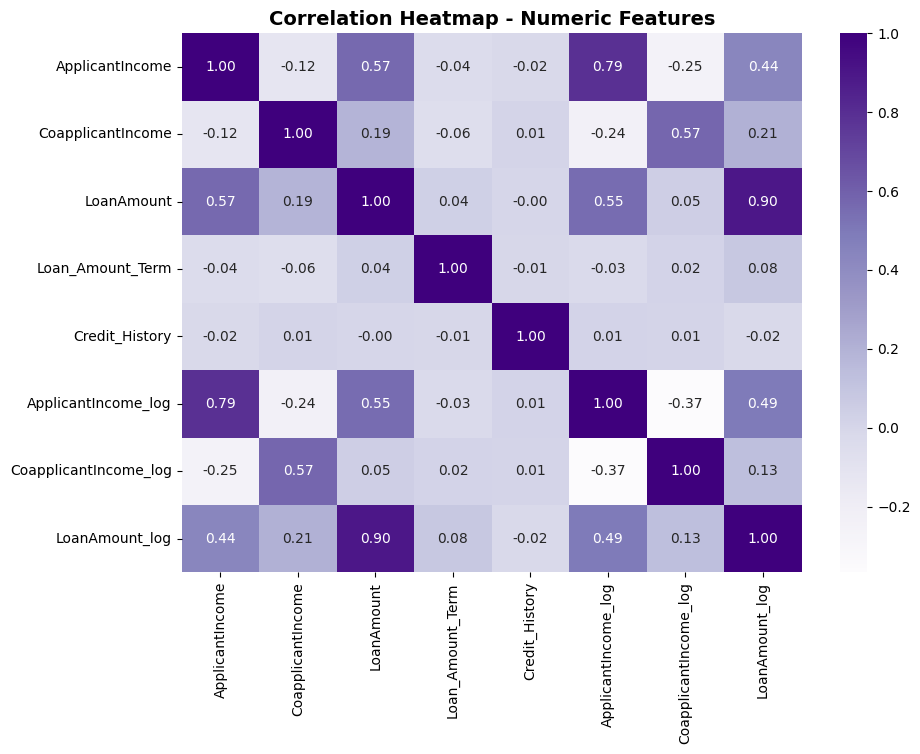

In [20]:
numeric=train.select_dtypes(include=['int64','float64'])
plt.figure(figsize=(10,7))
sns.heatmap(numeric.corr(),annot=True,fmt='.2f',cmap='Purples')
plt.title("Correlation Heatmap - Numeric Features", fontsize=14, fontweight='bold')
plt.show()

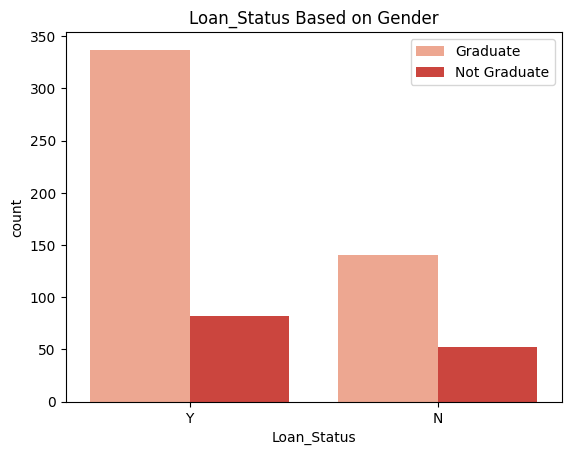

In [21]:
sns.countplot(x=train['Loan_Status'],hue=train['Education'],palette='Reds')
plt.legend(loc='upper right',ncol=1)
plt.title('Loan_Status Based on Gender')
plt.show()

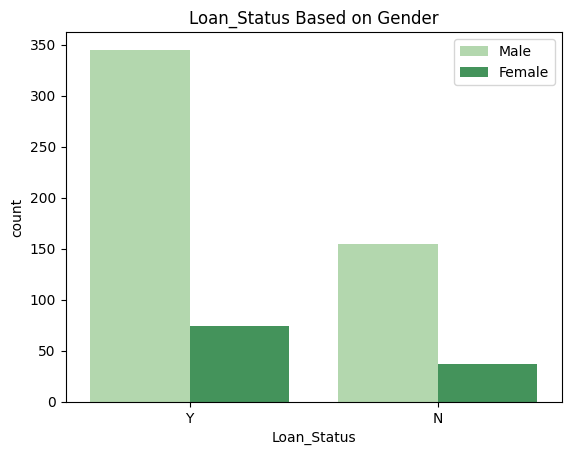

In [22]:
sns.countplot(x=train['Loan_Status'],hue=train['Gender'],palette='Greens')
plt.legend(loc='upper right',ncol=1)
plt.title('Loan_Status Based on Gender')
plt.show()

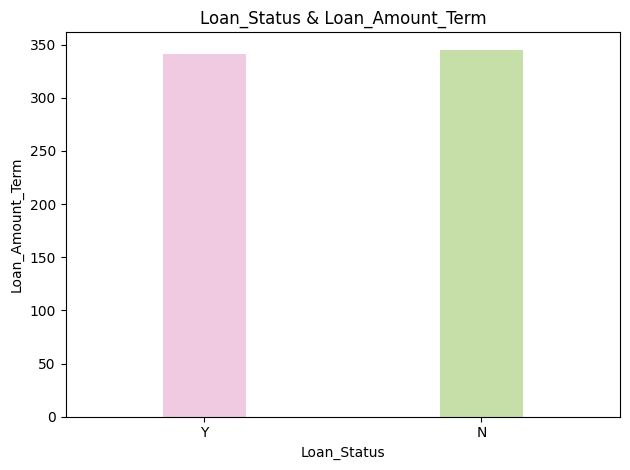

In [23]:
sns.barplot(x=train['Loan_Status'],y=train['Loan_Amount_Term'],errorbar=None,width=0.3,palette='PiYG')
plt.title('Loan_Status & Loan_Amount_Term')
plt.tight_layout()
plt.show()

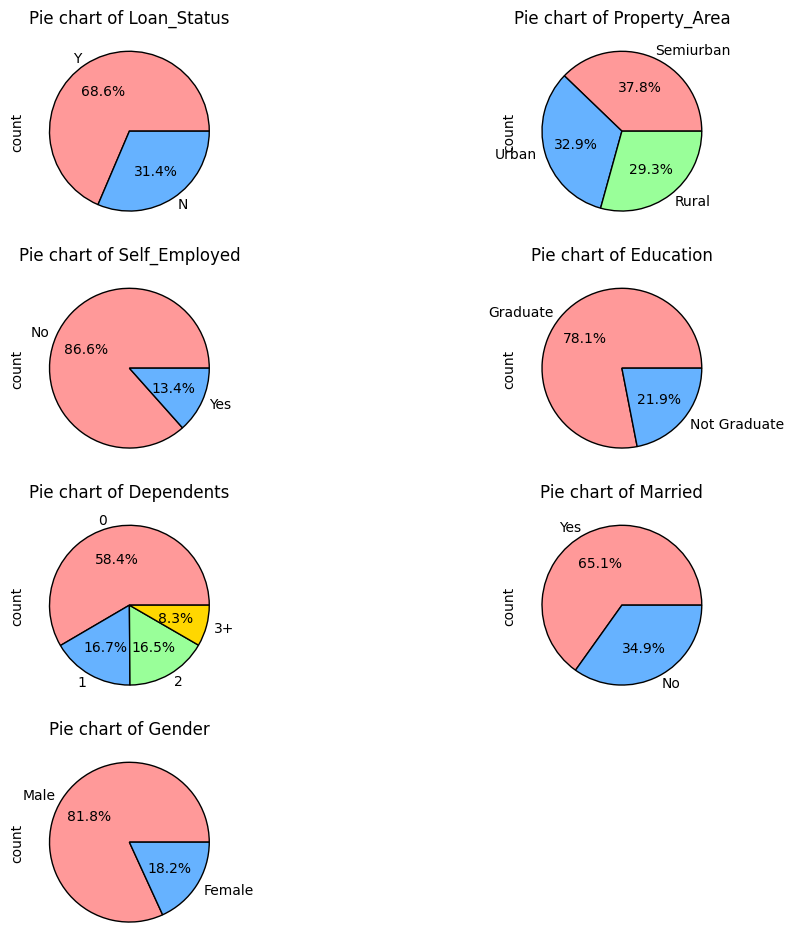

In [24]:
categorical_cols=['Loan_Status','Property_Area','Self_Employed','Education','Dependents','Married','Gender']
colors=["#FF9999", "#66B2FF", "#99FF99", "#FFD700", "#FFB6C1"]
plt.figure(figsize=(10,12))
for i,col in enumerate(categorical_cols,1):
   plt.subplot(5, 2, i) 
   train[col].value_counts().plot.pie(autopct='%1.1f%%',wedgeprops={'edgecolor':'black'},colors=colors)
   plt.title(f"Pie chart of {col}")


plt.tight_layout()
plt.show()

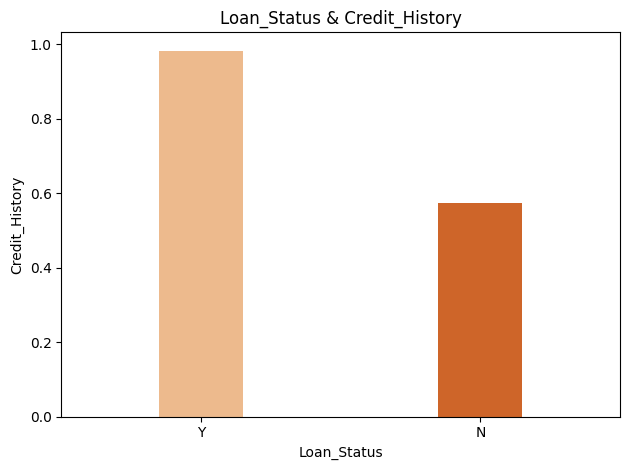

In [25]:
sns.barplot(x=train['Loan_Status'],y=train['Credit_History'],errorbar=None,width=0.3,palette='Oranges')
plt.title('Loan_Status & Credit_History')
plt.tight_layout()
plt.show()

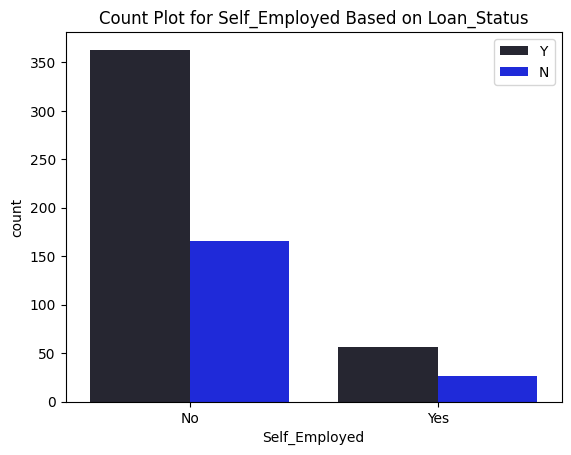

In [26]:
sns.countplot(x=train['Self_Employed'],hue=train['Loan_Status'],color='#000ff876')
plt.legend(loc='upper right',ncol=1)
plt.title('Count Plot for Self_Employed Based on Loan_Status')
plt.show()

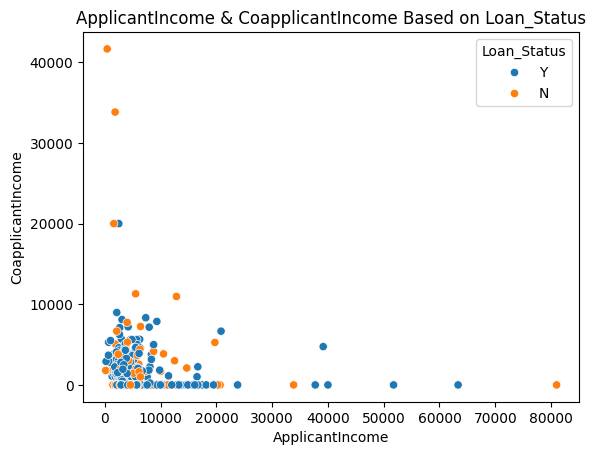

In [27]:
sns.scatterplot(x=train['ApplicantIncome'],y=train['CoapplicantIncome'],hue=train['Loan_Status'])
plt.title('ApplicantIncome & CoapplicantIncome Based on Loan_Status')
plt.show()

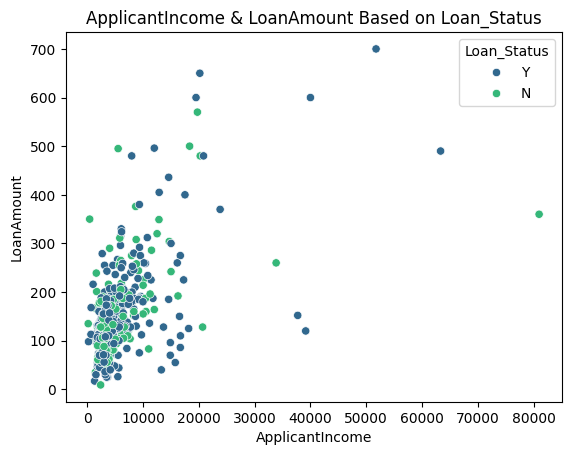

In [28]:
sns.scatterplot(x=train['ApplicantIncome'],y=train['LoanAmount'],hue=train['Loan_Status'],palette='viridis')
plt.title('ApplicantIncome & LoanAmount Based on Loan_Status')
plt.show()

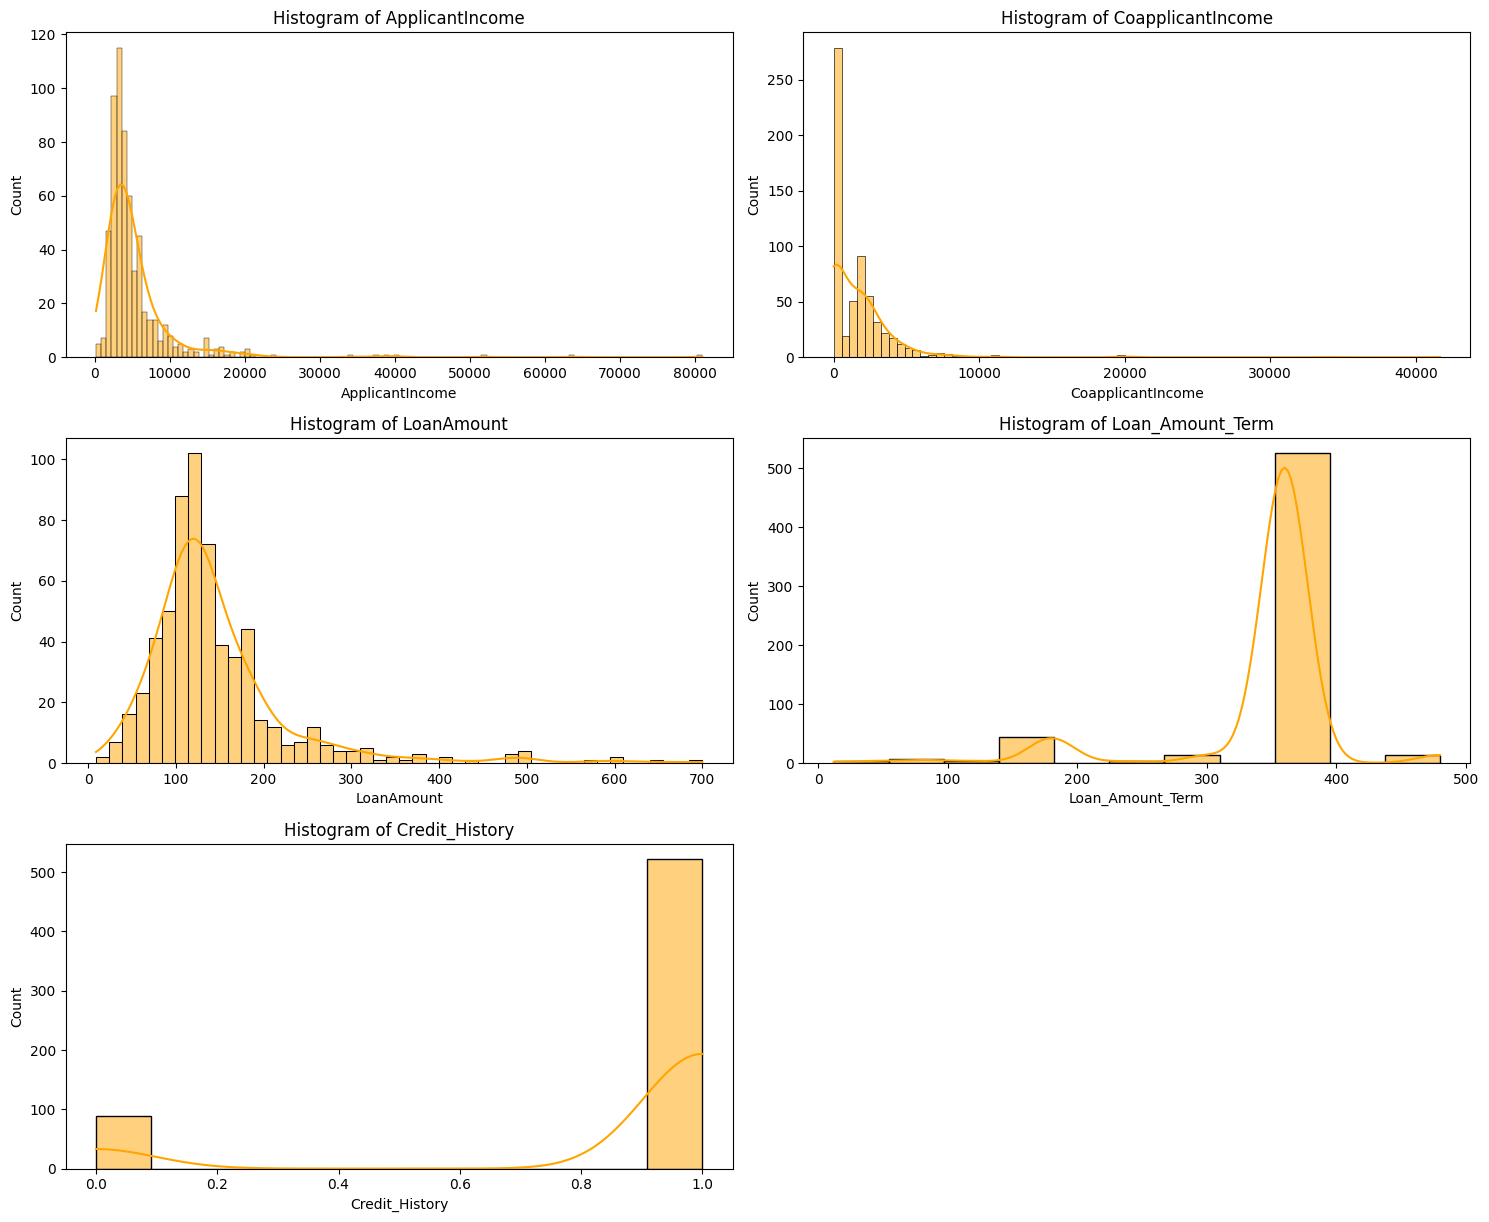

In [29]:
numeric_cols=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']     
plt.figure(figsize=(15, 20))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(5, 2, i)
    sns.histplot(train[col], kde=True, color="orange")
    plt.title(f"Histogram of {col}")
plt.tight_layout()
plt.show()

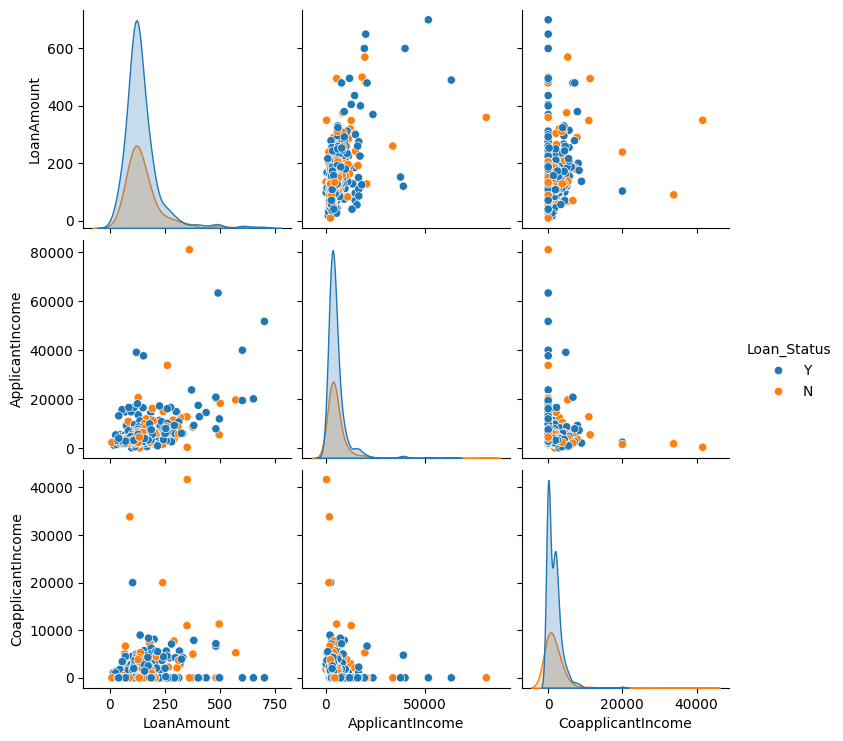

In [30]:
sns.pairplot(train[["LoanAmount", "ApplicantIncome", "CoapplicantIncome", "Loan_Status"]],hue="Loan_Status")
plt.show()


Data Preprocessing

Encoding

In [31]:
label_col = ['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status']
encoders = {}  
for col in label_col:
    le = LabelEncoder()
    train[col] = le.fit_transform(train[col].astype(str)) 
    encoders[col] = le 


In [32]:
train['Dependents'] = train['Dependents'].replace('3+',3).astype(int)

Feature Engineering

In [33]:
train["Total_Income"] = train["ApplicantIncome"] + train["CoapplicantIncome"]
train["Loan_Income_Ratio"] = train["LoanAmount"] / train["Total_Income"]
train["Income_per_Person"] = train["Total_Income"] / (train["Dependents"]+1)

Split Data

In [34]:
train.drop(columns=['Loan_ID'],inplace=True)

In [35]:
X=train.drop(['Loan_Status'],axis=1)
y=train['Loan_Status']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Feature Selection

In [37]:
log_reg_base = LogisticRegression(max_iter=2000, solver="liblinear", penalty="l1")
rfe = RFE(log_reg_base, n_features_to_select=10)  
rfe.fit(X_train, y_train)

X_train_fs = rfe.transform(X_train)
X_test_fs = rfe.transform(X_test)

In [38]:
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_fs, y_train)

Scaling

In [39]:
scaler = StandardScaler()
X_train_res = scaler.fit_transform(X_train_res)
X_test_fs = scaler.transform(X_test_fs)

Model Training

LogisticRegression

In [40]:
log_reg = LogisticRegression(max_iter=2000, class_weight="balanced", random_state=42)
log_reg.fit(X_train_res, y_train_res)

LogisticRegression(class_weight='balanced', max_iter=2000, random_state=42)

In [41]:
y_pred_log = log_reg.predict(X_test_fs)

In [42]:
print("******** Logistic Regression with RFE ********")
print("\nClassification Report:\n", classification_report(y_test,y_pred_log))
print(f'f1_score: {f1_score(y_test,y_pred_log)}')
print(f'accuracy_score: {accuracy_score(y_test,y_pred_log)}')

******** Logistic Regression with RFE ********

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.56      0.66        39
           1       0.82      0.93      0.87        84

    accuracy                           0.81       123
   macro avg       0.80      0.75      0.76       123
weighted avg       0.81      0.81      0.80       123

f1_score: 0.8715083798882681
accuracy_score: 0.8130081300813008


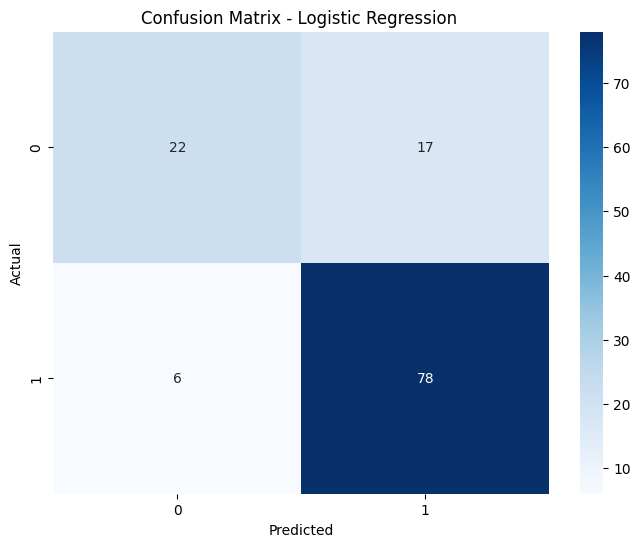

In [43]:
cm = confusion_matrix(y_test, y_pred_log)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title(f"Confusion Matrix - Logistic Regression ")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [44]:
smote = SMOTE(random_state=42)
X_train_res_rf, y_train_res_rf = smote.fit_resample(X_train , y_train)

In [45]:
scaler_rf = StandardScaler()
X_train_res_rf = scaler_rf.fit_transform(X_train_res_rf)
X_test_rf = scaler_rf.transform(X_test)

RandomForestClassifier

In [46]:
rf = RandomForestClassifier(n_estimators=500, max_depth=20, random_state=42, class_weight="balanced",min_samples_split=2)
rf.fit(X_train_res_rf, y_train_res_rf)

RandomForestClassifier(class_weight='balanced', max_depth=20, n_estimators=500,
                       random_state=42)

In [47]:
y_pred_rf = rf.predict(X_test_rf)

In [48]:
print("\n******** Random Forest ********")
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print(f'f1_score: {f1_score(y_test, y_pred_rf)}')
print(f'accuracy_score: {accuracy_score(y_test, y_pred_rf)}')


******** Random Forest ********

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.72      0.69        39
           1       0.86      0.83      0.85        84

    accuracy                           0.80       123
   macro avg       0.77      0.78      0.77       123
weighted avg       0.80      0.80      0.80       123

f1_score: 0.8484848484848485
accuracy_score: 0.7967479674796748


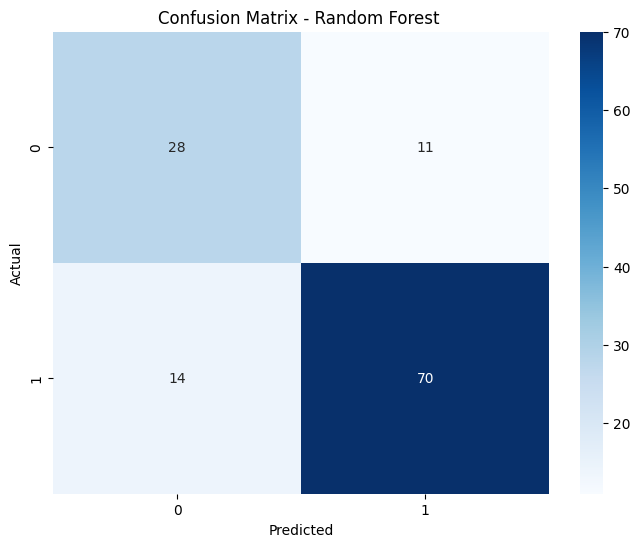

In [49]:
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title(f"Confusion Matrix - Random Forest ")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [50]:
X_train_res_xgb, y_train_res_xgb = smote.fit_resample(X_train, y_train)

In [51]:
scaler_xgb = StandardScaler()
X_train_res_xgb = scaler_xgb.fit_transform(X_train_res_xgb)
X_test_xgb = scaler_xgb.transform(X_test)

XGBClassifier

In [52]:
xgb = XGBClassifier(n_estimators=200, learning_rate=0.01, max_depth=10, random_state=42, scale_pos_weight=1,subsample=1)
xgb.fit(X_train_res_xgb, y_train_res_xgb)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, ...)

In [53]:
y_pred_xgb = xgb.predict(X_test_xgb)

In [54]:
print("\n******** XGBoost ********")
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))
print(f'f1_score: {f1_score(y_test, y_pred_xgb)}')
print(f'accuracy_score: {accuracy_score(y_test, y_pred_xgb)}')


******** XGBoost ********

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.79      0.75        39
           1       0.90      0.85      0.87        84

    accuracy                           0.83       123
   macro avg       0.80      0.82      0.81       123
weighted avg       0.84      0.83      0.83       123

f1_score: 0.8711656441717791
accuracy_score: 0.8292682926829268


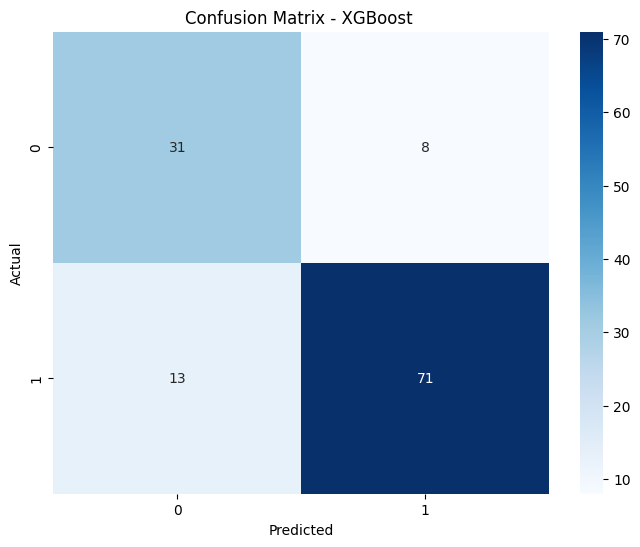

In [55]:
cm = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title(f"Confusion Matrix - XGBoost ")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

Decision Tree

In [56]:
X_train_res_dt, y_train_res_dt = smote.fit_resample(X_train, y_train)

In [57]:
scaler_dt = StandardScaler()
X_train_res_dt = scaler_dt.fit_transform(X_train_res_dt)
X_test_dt = scaler_dt.transform(X_test)

In [58]:
dt=DecisionTreeClassifier(max_depth=10 , min_samples_split= 5,class_weight='balanced')
dt.fit(X_train_res_dt,y_train_res_dt)

DecisionTreeClassifier(class_weight='balanced', max_depth=10,
                       min_samples_split=5)

In [59]:
y_pred_dt =dt.predict(X_test_dt)

In [60]:
print("\n******** Decision Tree ********")
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))
print(f'f1_score: {f1_score(y_test, y_pred_dt)}')
print(f'accuracy_score: {accuracy_score(y_test, y_pred_dt)}')


******** Decision Tree ********

Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.69      0.61        39
           1       0.84      0.74      0.78        84

    accuracy                           0.72       123
   macro avg       0.69      0.72      0.70       123
weighted avg       0.75      0.72      0.73       123

f1_score: 0.7848101265822784
accuracy_score: 0.7235772357723578


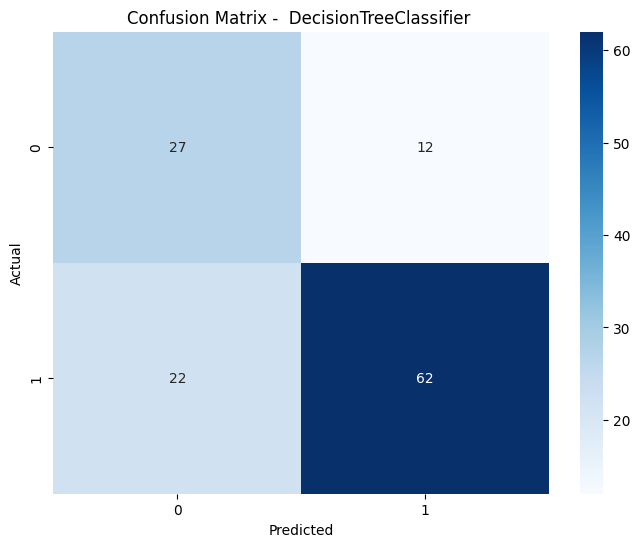

In [61]:
cm = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title(f"Confusion Matrix -  DecisionTreeClassifier ")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

Testing Data

In [62]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [63]:
test_data = test.drop(columns=['Loan_ID'])


Handele Null Values

In [64]:
null_object_values = ['Gender','Dependents','Self_Employed','Credit_History','Loan_Amount_Term']
for col in null_object_values:
    test_data[col].fillna(train[col].mode()[0], inplace=True)

In [65]:
test_data['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [66]:
test_data.dropna(subset=['Married'], inplace=True)


Handle Outliers

In [67]:
test_data['ApplicantIncome_log'] = np.log1p(test_data['ApplicantIncome'])
test_data['CoapplicantIncome_log'] = np.log1p(test_data['CoapplicantIncome'])
test_data['LoanAmount_log'] = np.log1p(test_data['LoanAmount'])

Encoding

In [68]:
test_data.dtypes

Gender                    object
Married                   object
Dependents                object
Education                 object
Self_Employed             object
ApplicantIncome            int64
CoapplicantIncome          int64
LoanAmount               float64
Loan_Amount_Term         float64
Credit_History           float64
Property_Area             object
ApplicantIncome_log      float64
CoapplicantIncome_log    float64
LoanAmount_log           float64
dtype: object

In [69]:
for col in ['Gender','Married','Education','Self_Employed','Property_Area']:
    valid_classes = set(encoders[col].classes_)
    test_data[col] = test_data[col].apply(
        lambda x: x if x in valid_classes else encoders[col].classes_[0]
    )
    test_data[col] = encoders[col].transform(test_data[col].astype(str))

In [70]:
test_data['Dependents'] = test_data['Dependents'].replace('3+',3).astype(int)

Feature Engineering

In [71]:
test_data["Total_Income"] = test_data["ApplicantIncome"] + test_data["CoapplicantIncome"]
test_data["Loan_Income_Ratio"] = test_data["LoanAmount"] / test_data["Total_Income"]
test_data["Income_per_Person"] = test_data["Total_Income"] / (test_data["Dependents"]+1)


Predict With The Best Model (XGBoost)

In [72]:
X_test_final = scaler_xgb.transform(test_data)
test_predictions = xgb.predict(X_test_final)

In [73]:
submission = pd.DataFrame({
    "Loan_ID": test["Loan_ID"],
    "Loan_Status": test_predictions
})

In [74]:
submission["Loan_Status"] = submission["Loan_Status"].map({1: "Y", 0: "N"})

In [75]:
submission.to_csv("submission.csv", index=False)
print("Test predictions saved in submission.csv")

Test predictions saved in submission.csv
